In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from wordcloud import WordCloud
from datetime import date

In [2]:
sns.set_style("whitegrid")

In [3]:
transcript=pd.read_csv(r"C:\Users\welcome\Desktop\Data Sets\transcript.csv")
profile=pd.read_csv(r"C:\Users\welcome\Desktop\Data Sets\profile.csv", parse_dates=['became_member_on'])
portfolio=pd.read_csv(r"C:\Users\welcome\Desktop\Data Sets\portfolio.csv")

In [4]:
transcript=transcript.drop_duplicates()
profile=profile.drop_duplicates()
portfolio=portfolio.drop_duplicates()

In [5]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 14.0+ MB


In [6]:
transcript.head(10)

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
5,5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
6,6,c4863c7985cf408faee930f111475da3,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0
7,7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
8,8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
9,9,31dda685af34476cad5bc968bdb01c53,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


In [7]:
# Display the count of unique values for each column
table = []
for col in transcript.columns:
    row = [col, transcript[col].nunique()]
    table.append(row)
print(tabulate(table, headers=['Column', 'Unique Values']))

Column        Unique Values
----------  ---------------
Unnamed: 0           306534
person                17000
event                     4
value                  5121
time                    120


In [8]:
# Drop unnecessary columns
transcript = transcript.drop("Unnamed: 0", axis=1)

In [9]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [10]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [11]:
# # Plot histograms for numerical columns
# # for col in transcript.select_dtypes(include="number").columns:
#     sns.histplot(x=col, data=transcript, kde=True)
#     plt.show()

In [12]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        17000 non-null  int64         
 1   gender            14825 non-null  object        
 2   age               17000 non-null  int64         
 3   id                17000 non-null  object        
 4   became_member_on  17000 non-null  datetime64[ns]
 5   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 929.7+ KB


In [13]:
profile.head(10)

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN
5,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
6,6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,NaN
7,7,NaN,118,68617ca6246f4fbc85e91a2a49552598,2017-10-02,NaN
8,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
9,9,NaN,118,8974fc5686fe429db53ddde067b88302,2016-11-22,NaN


In [14]:
# Display the count of unique values for each column
table = []
for col in profile.columns:
    row = [col, profile[col].nunique()]
    table.append(row)
print(tabulate(table, headers=['Column', 'Unique Values']))

Column              Unique Values
----------------  ---------------
Unnamed: 0                  17000
gender                          3
age                            85
id                          17000
became_member_on             1716
income                         91


In [15]:
# Drop unnecessary columns
profile = profile.drop("Unnamed: 0", axis=1)

In [16]:
# Display the count of unique values for each column
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

In [17]:
profile.describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


In [18]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [19]:
profile=profile.dropna()

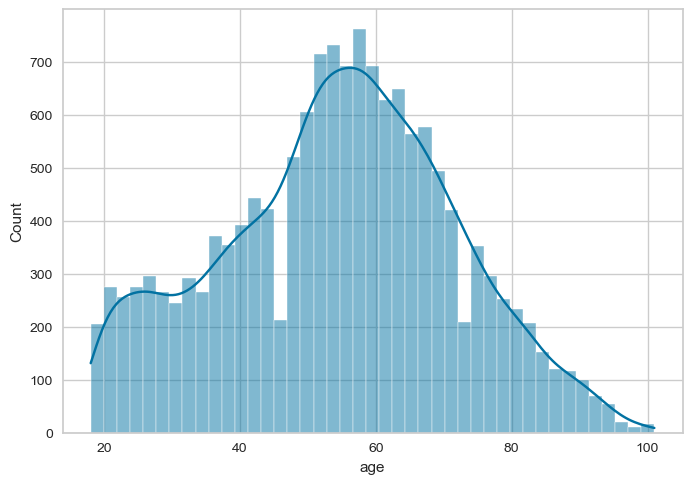

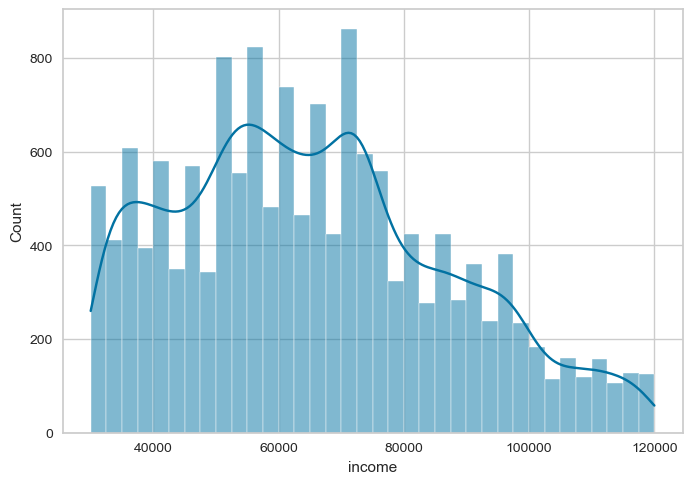

In [20]:
# Plot histograms for numerical columns
for col in profile.select_dtypes(include="number").columns:
    sns.histplot(x=col, data=profile, kde=True)
    plt.show()

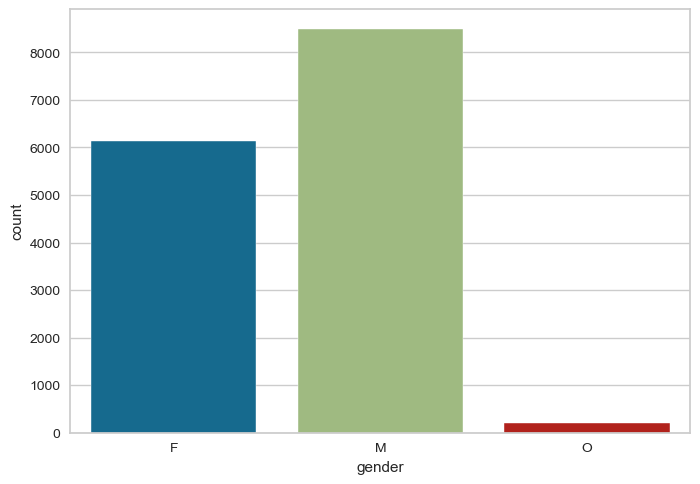

In [21]:
for col in [profile['gender']]:
    sns.countplot(x=col, data=profile)
    plt.show()

In [22]:
profile[profile['age']>100]

,gender,age,id,became_member_on,income
1556,F,101,4d2ccfcbbebf4bd9baf4b7e433d0e288,2017-10-04,43000.0
4100,F,101,d2fdc2be8ab64e4ba04830d441e53fd5,2015-05-26,99000.0
14846,F,101,e0ea90ddd2f147e082d21e97f51ec1b1,2017-11-09,56000.0
15800,F,101,047ad0135cfe4c0ea5ba019da4de9c52,2017-03-09,59000.0
16864,F,101,1593d617fac246ef8e50dbb0ffd77f5f,2017-11-27,82000.0


In [23]:
# Display percentage of outliers for each numerical column
table = []
Num_Columns=profile.select_dtypes(include="number")
for col in Num_Columns:
    IQR = profile[col].quantile(0.75) - profile[col].quantile(0.25)
    lower = profile[col].quantile(0.25) - 1.5 * IQR
    upper = profile[col].quantile(0.75) + 1.5 * IQR
    outlier = (profile[col] <= lower) | (profile[col] >= upper)
    outlier_percentage = (profile[outlier].shape[0] / profile.shape[0]) * 100
    row = [col, outlier_percentage]
    table.append(row)
print(tabulate(table, headers=['Column', 'Outlier Percentage']))

Column      Outlier Percentage
--------  --------------------
age                          0
income                       0


In [24]:
table = []
Num_Columns=profile.select_dtypes(include="number")
for col in Num_Columns:
    IQR = profile[col].quantile(0.75) - profile[col].quantile(0.25)
    lower = profile[col].quantile(0.25) - 1.5 * IQR
    upper = profile[col].quantile(0.75) + 1.5 * IQR
    outlier = (profile[col] <= lower) | (profile[col] >= upper)
    profile.drop(profile[outlier].index, inplace=True)

In [25]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 640.0+ bytes


In [26]:
portfolio.head(10)

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [27]:
# Display the count of unique values for each column
table = []
for col in portfolio.columns:
    row = [col, portfolio[col].nunique()]
    table.append(row)
print(tabulate(table, headers=['Column', 'Unique Values']))

Column        Unique Values
----------  ---------------
Unnamed: 0               10
reward                    5
channels                  4
difficulty                5
duration                  5
offer_type                3
id                       10


In [28]:
# Drop unnecessary columns
portfolio = portfolio.drop("Unnamed: 0", axis=1)

In [29]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


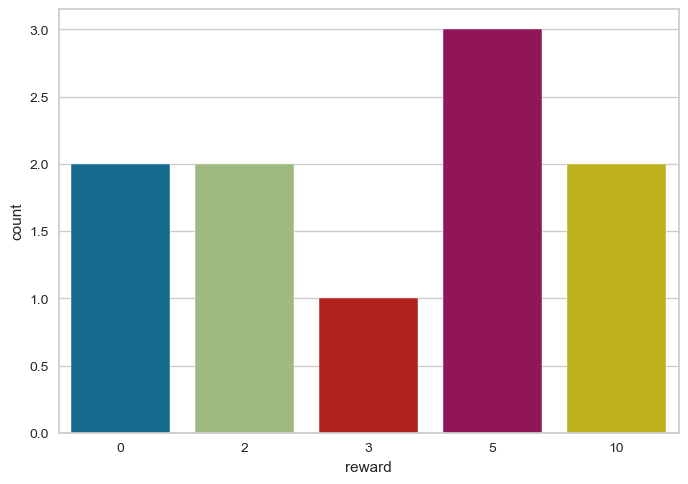

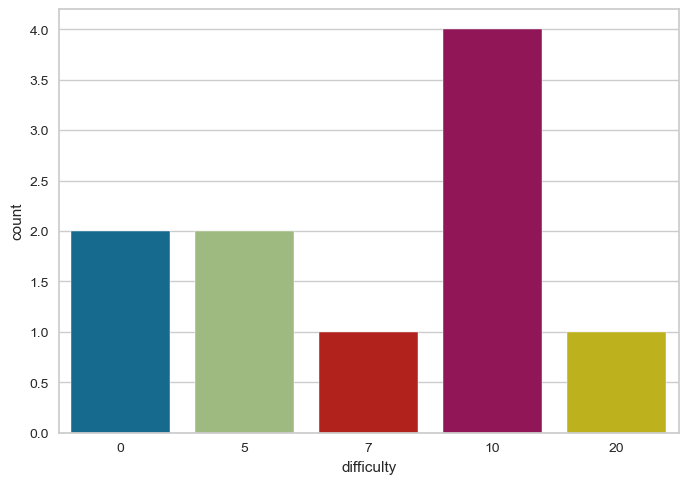

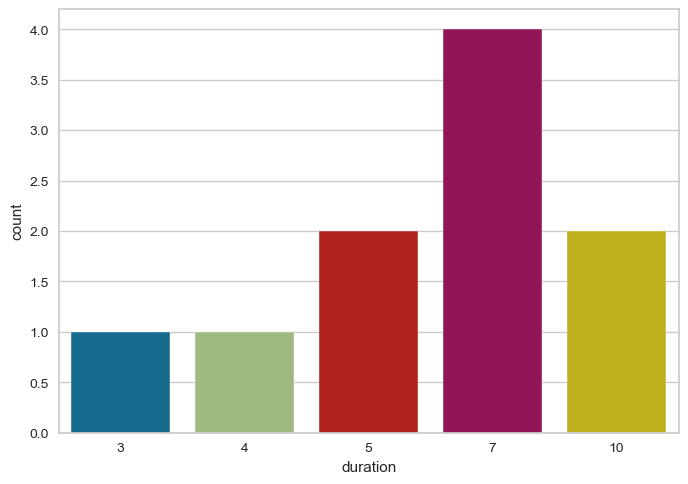

In [30]:
# Plot histograms for numerical columns
for col in portfolio.select_dtypes(include="number").columns:
    sns.countplot(x=col, data=portfolio)
    plt.show()

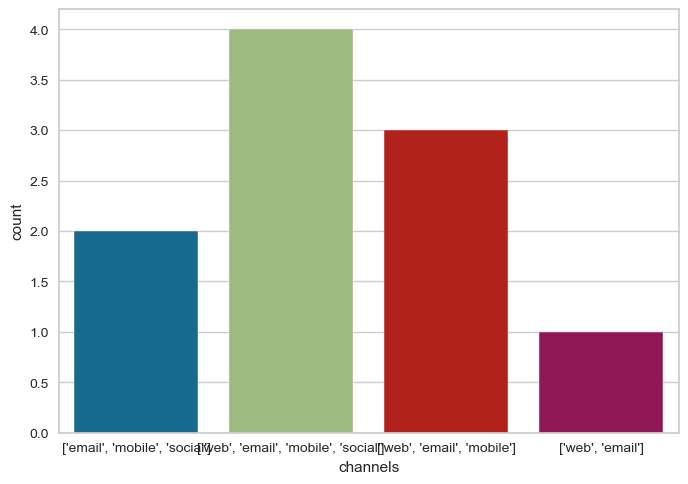

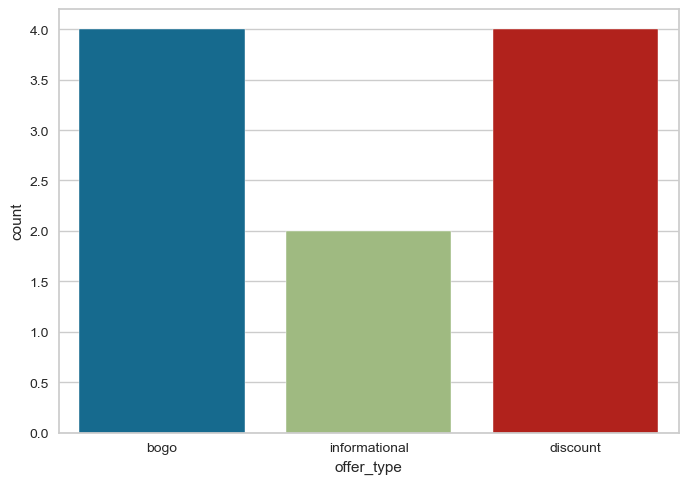

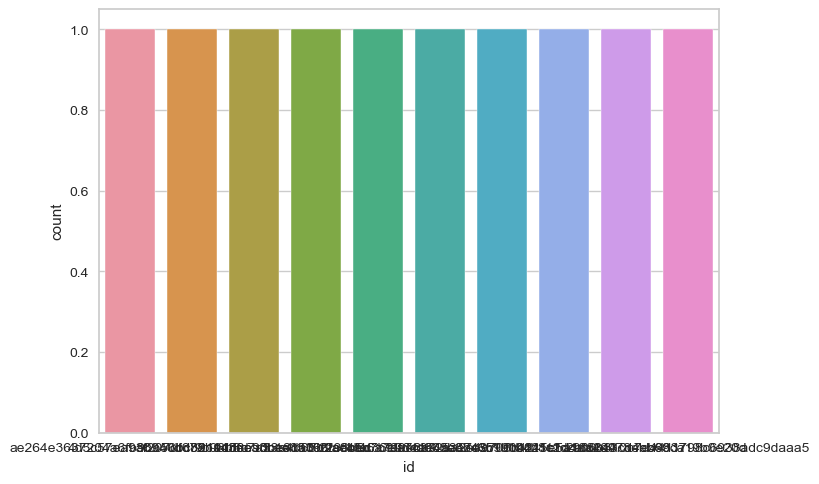

In [31]:
# Plot histograms for numerical columns
for col in portfolio.select_dtypes(include="object").columns:
    sns.countplot(x=col, data=portfolio)
    plt.show()

In [32]:
profile['year'] = profile['became_member_on'].dt.year
profile['month'] = profile['became_member_on'].dt.month
profile['day']=profile['became_member_on'].dt.day_name()
profile['member_since'] = (pd.to_datetime('today') - profile['became_member_on']).astype('timedelta64[D]').astype(int)

In [33]:
profile['age_group'] = pd.cut(x=profile['age'], bins=[18, 20, 40, 60, 80, 101],
                    labels=['Teenage(0-19)', 'young(20-39)', 'Middle-age(40-59)',
                            'Old(60-79)', 'Very-Old(80-100)'], include_lowest=True)

In [34]:
profile['income_group'] = pd.cut(x=profile['income'], bins=[0,50000, 60000, 70000, 80000, 90000, 100000, 200000],
                    labels=['<50k', '50k-60k', '60k-70k',
                            '70k-80k', '80k-90k', '90k-1L', '1L-2L'], include_lowest=True)

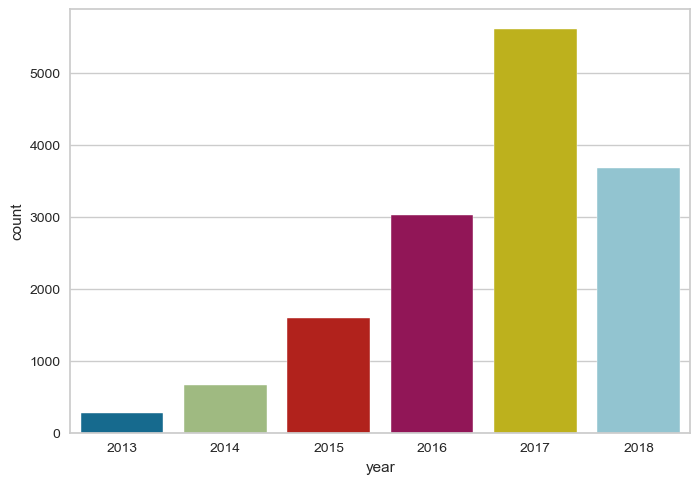

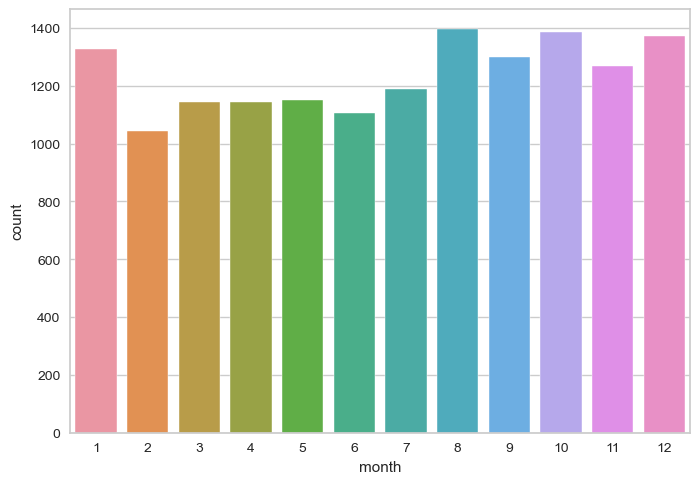

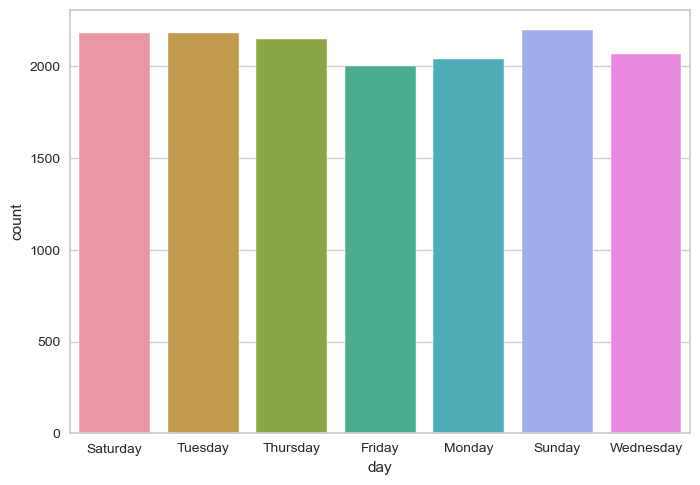

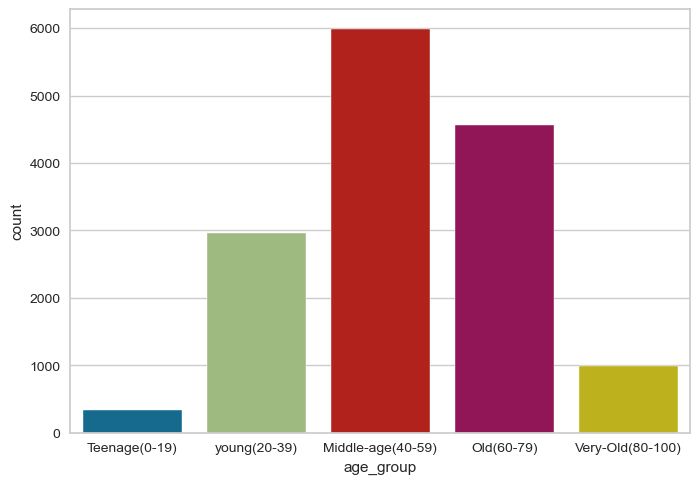

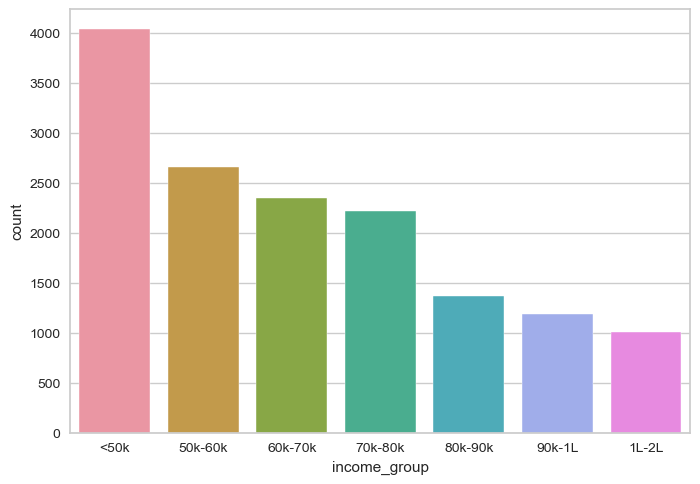

In [35]:
for col in [profile['year'], profile['month'], profile['day'], profile['age_group'], profile['income_group']]:
    sns.countplot(x=col, data=profile)
    plt.show()

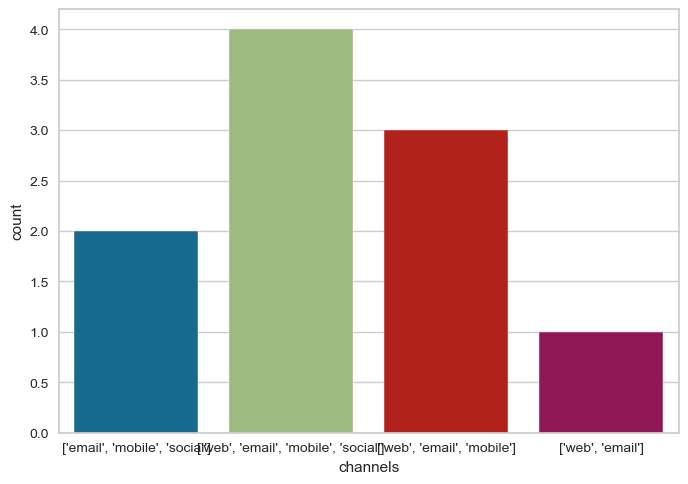

In [36]:
sns.countplot(x=portfolio['channels'], data=profile)
plt.show()

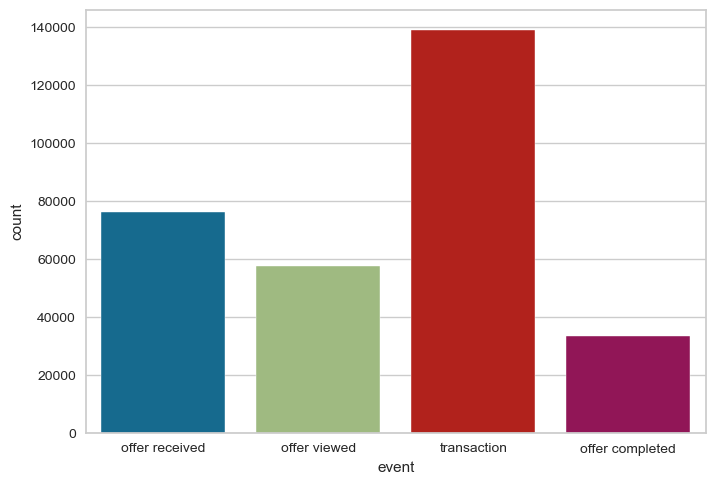

In [37]:
sns.countplot(x=transcript['event'], data=transcript)
plt.show()

In [38]:
# Define substrings to remove
substrings_to_remove = [ "'", '{offer id: ', '{amount: ', '}', '{offer_id: ', ', reward: 2',', reward: 3',', reward: 5', ', reward: 5', ', reward: 2', ', reward: 10',', reward: 5', ', reward: 10']

# Replace substrings with an empty string
for substring in substrings_to_remove:
    transcript['value'] = transcript['value'].str.replace(substring, '')

C:\Users\welcome\AppData\Local\Temp\ipykernel_1516\894847383.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  transcript['value'] = transcript['value'].str.replace(substring, '')
C:\Users\welcome\AppData\Local\Temp\ipykernel_1516\894847383.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  transcript['value'] = transcript['value'].str.replace(substring, '')


In [39]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [40]:
transcript_offer_type=transcript[transcript['event'].isin(['offer received', 'offer viewed', 'offer completed'])]

portfolio_transcript = portfolio.merge(right=transcript_offer_type, how='right', left_on='id', right_on='value')
portfolio_transcript.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
person        0
event         0
value         0
time          0
dtype: int64

In [41]:
portfolio_transcript.drop(["id"] , axis=1, inplace=True)

In [42]:
# transcript_offer_type=transcript[transcript['event'].isin(['offer received', 'offer viewed', 'offer completed'])]
profile_transcript_portfolio = profile.merge(right=portfolio_transcript, how='inner', left_on='id', right_on='person')
profile_transcript_portfolio.isna().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
year                0
month               0
day                 0
member_since        0
age_group           0
income_group        0
reward              0
channels            0
difficulty          0
duration            0
offer_type          0
person              0
event               0
value               0
time                0
dtype: int64

In [44]:
cust_data=profile_transcript_portfolio.drop(["age", "became_member_on", "income"] , axis=1)
cust_data.columns

Index(['gender', 'id', 'year', 'month', 'day', 'member_since', 'age_group',
       'income_group', 'reward', 'channels', 'difficulty', 'duration',
       'offer_type', 'person', 'event', 'value', 'time'],
      dtype='object')

In [45]:
cust_data = cust_data.rename(columns={'member_since_how_manydays': 'member_since'})

In [46]:
cust_data.head()

,gender,id,year,month,day,member_since,age_group,income_group,reward,channels,difficulty,duration,offer_type,person,event,value,time
0,F,0610b486422d4921ae7d2bf64640c50b,2017,7,Saturday,2532,Middle-age(40-59),1L-2L,5,"['web', 'email', 'mobile']",5,7,bogo,0610b486422d4921ae7d2bf64640c50b,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,408
1,F,0610b486422d4921ae7d2bf64640c50b,2017,7,Saturday,2532,Middle-age(40-59),1L-2L,0,"['web', 'email', 'mobile']",0,4,informational,0610b486422d4921ae7d2bf64640c50b,offer received,3f207df678b143eea3cee63160fa8bed,504
2,F,0610b486422d4921ae7d2bf64640c50b,2017,7,Saturday,2532,Middle-age(40-59),1L-2L,5,"['web', 'email', 'mobile']",5,7,bogo,0610b486422d4921ae7d2bf64640c50b,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,528
3,F,78afa995795e4d85b5d9ceeca43f5fef,2017,5,Tuesday,2599,Old(60-79),90k-1L,5,"['web', 'email', 'mobile']",5,7,bogo,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
4,F,78afa995795e4d85b5d9ceeca43f5fef,2017,5,Tuesday,2599,Old(60-79),90k-1L,5,"['web', 'email', 'mobile']",5,7,bogo,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6


In [47]:
cust_data_copy=cust_data.copy()

In [48]:
# Encode categorical variables
cust_data_encoded = cust_data.copy()
label_encoder = LabelEncoder()
Cat_Columns=cust_data.select_dtypes(include=["object","category"]).columns
for col in Cat_Columns:
    cust_data_encoded[col] = label_encoder.fit_transform(cust_data[col])
# cust_data_encoded = pd.get_dummies(cust_data_encoded)
cust_data_encoded.head()

,gender,id,year,month,day,member_since,age_group,income_group,reward,channels,difficulty,duration,offer_type,person,event,value,time
0,0,346,2017,7,2,2532,0,0,5,2,5,7,0,346,1,6,408
1,0,346,2017,7,2,2532,0,0,0,2,0,4,2,346,1,3,504
2,0,346,2017,7,2,2532,0,0,5,2,5,7,0,346,0,6,528
3,0,6960,2017,5,5,2599,1,5,5,2,5,7,0,6960,1,6,0
4,0,6960,2017,5,5,2599,1,5,5,2,5,7,0,6960,2,6,6


In [49]:
cust_data_copy.head(150)

,gender,id,year,month,day,member_since,age_group,income_group,reward,channels,difficulty,duration,offer_type,person,event,value,time
0,F,0610b486422d4921ae7d2bf64640c50b,2017,7,Saturday,2532,Middle-age(40-59),1L-2L,5,"['web', 'email', 'mobile']",5,7,bogo,0610b486422d4921ae7d2bf64640c50b,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,408
1,F,0610b486422d4921ae7d2bf64640c50b,2017,7,Saturday,2532,Middle-age(40-59),1L-2L,0,"['web', 'email', 'mobile']",0,4,informational,0610b486422d4921ae7d2bf64640c50b,offer received,3f207df678b143eea3cee63160fa8bed,504
2,F,0610b486422d4921ae7d2bf64640c50b,2017,7,Saturday,2532,Middle-age(40-59),1L-2L,5,"['web', 'email', 'mobile']",5,7,bogo,0610b486422d4921ae7d2bf64640c50b,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,528
3,F,78afa995795e4d85b5d9ceeca43f5fef,2017,5,Tuesday,2599,Old(60-79),90k-1L,5,"['web', 'email', 'mobile']",5,7,bogo,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
4,F,78afa995795e4d85b5d9ceeca43f5fef,2017,5,Tuesday,2599,Old(60-79),90k-1L,5,"['web', 'email', 'mobile']",5,7,bogo,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,9b98b8c7a33c4b65b9aebfe6a799e6d9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,M,f806632c011441378d4646567f357a21,2013,8,Sunday,3966,Middle-age(40-59),60k-70k,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,f806632c011441378d4646567f357a21,offer completed,4d5c57ea9a6940dd891ad53e9dbe8da0,210
146,M,f806632c011441378d4646567f357a21,2013,8,Sunday,3966,Middle-age(40-59),60k-70k,2,"['web', 'email', 'mobile', 'social']",10,10,discount,f806632c011441378d4646567f357a21,offer received,fafdcd668e3743c1bb461111dcafc2a4,408
147,M,f806632c011441378d4646567f357a21,2013,8,Sunday,3966,Middle-age(40-59),60k-70k,2,"['web', 'email', 'mobile', 'social']",10,10,discount,f806632c011441378d4646567f357a21,offer viewed,fafdcd668e3743c1bb461111dcafc2a4,408
148,M,f806632c011441378d4646567f357a21,2013,8,Sunday,3966,Middle-age(40-59),60k-70k,2,"['web', 'email', 'mobile', 'social']",10,10,discount,f806632c011441378d4646567f357a21,offer completed,fafdcd668e3743c1bb461111dcafc2a4,462


In [50]:
# Scale numerical variables using MinMaxScaler
cust_data_scaled = cust_data_encoded.copy()
scaler = MinMaxScaler()
Columns = cust_data_encoded.columns
for col in Columns:
    cust_data_scaled[col] = scaler.fit_transform(cust_data_encoded[[col]])

In [51]:
cust_data_scaled.head()

,gender,id,year,month,day,member_since,age_group,income_group,reward,channels,difficulty,duration,offer_type,person,event,value,time
0,0.0,0.023348,0.8,0.545455,0.333333,0.206253,0.00,0.000000,0.5,0.666667,0.25,0.571429,0.0,0.023348,0.5,0.666667,0.571429
1,0.0,0.023348,0.8,0.545455,0.333333,0.206253,0.00,0.000000,0.0,0.666667,0.00,0.142857,1.0,0.023348,0.5,0.333333,0.705882
2,0.0,0.023348,0.8,0.545455,0.333333,0.206253,0.00,0.000000,0.5,0.666667,0.25,0.571429,0.0,0.023348,0.0,0.666667,0.739496
3,0.0,0.469667,0.8,0.363636,0.833333,0.243006,0.25,0.833333,0.5,0.666667,0.25,0.571429,0.0,0.469667,0.5,0.666667,0.000000
4,0.0,0.469667,0.8,0.363636,0.833333,0.243006,0.25,0.833333,0.5,0.666667,0.25,0.571429,0.0,0.469667,1.0,0.666667,0.008403


In [ ]:
# Visualize the elbow method to find optimal K in KMeans
plt.figure(figsize=(15, 5))
Elbow_M = KElbowVisualizer(KMeans(), k=(2, 15))
Elbow_M.fit(cust_data_scaled)
Elbow_M.show()

In [ ]:
# Apply KMeans clustering with obtained K
model = KMeans(n_clusters=6)
model.fit(cust_data_scaled)
# profile_transcript_copy["cluster"] = model.labels_

In [ ]:
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
embedding = pca.fit_transform(cust_data_scaled)
projection = pd.DataFrame(columns=['x', 'y'], data=embedding)
projection['Age_group'] = cust_data_copy['age_group']
projection['Income'] = cust_data_copy['income_group']
projection['cluster'] = model.labels_

In [ ]:
# Visualize clusters using scatter plot
fig = px.scatter(projection, x='x', y='y', color=model.labels_, hover_data=['Age_group', 'Income', 'cluster'])
fig.show()

In [ ]:
cust_data_copy["cluster"]=model.labels_

In [ ]:
# computing the mean values of numerical features for each cluster
cluster_means=pd.DataFrame()
for feature in ['age_group', 'income_group']:
    mode_series = cust_data_copy.groupby('cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

print(cluster_means)

In [ ]:
# Example: Analyzing clusters


# Group by cluster and analyze event counts
cluster_analysis = cust_data_copy.groupby('cluster','value')['event'].value_counts().unstack().fillna(0)
print(cluster_analysis)

# Visualize event counts by cluster
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_analysis, annot=True, cmap='Blues', fmt='g')
plt.title('Event Counts by Cluster')
plt.show()

# Example: Calculate offer completion rate by cluster
offer_completion_rate = cust_data_copy[cust_data_copy['event'] == 'offer completed'].groupby('cluster')['event'].count() / cust_data_copy.groupby('cluster')['event'].count()
print("Offer Completion Rate by Cluster:")
print(offer_completion_rate)

# Example: Analyze demographic distributions within clusters
sns.countplot(x='age_group', hue='cluster', data=cust_data_copy)
plt.title('Age Group Distribution by Cluster')
plt.show()

sns.countplot(x='income_group', hue='cluster', data=cust_data_copy)
plt.title('Income Group Distribution by Cluster')
plt.show()

# Example: Analyze offer types by cluster
offer_type_counts = cust_data_copy[cust_data_copy['event'].isin(['offer received', 'offer viewed', 'offer completed'])].groupby(['cluster', 'event'])['value'].count().unstack().fillna(0)
print("Offer Type Counts by Cluster:")
print(offer_type_counts)



In [ ]:


# Example: Define target variable
cust_data_copy['completed_offer'] = np.where(cust_data_copy['event'] == 'offer completed', 1, 0)

# # Example: Define features for modeling
# features = ['age_group', 'income_group', 'gender', 'value', 'cluster']

# Example: Split data into train and test sets
X = cust_data_scaled
y = cust_data_copy['completed_offer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Train a classification model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Example: Predictions and evaluation
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Example: Optimize hyperparameters (Grid Search)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Example: Retrain model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Example: Predictions and evaluation with best model
y_pred_best = best_model.predict(X_test)
print("Accuracy with best model:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Assuming cust_data_scaled and cust_data_copy are defined appropriately

# Example: Define target variable
cust_data_copy['completed_offer'] = np.where(cust_data_copy['event'] == 'offer completed', 1, 0)

# Example: Split data into train and test sets
X = cust_data_scaled  # Assuming cust_data_scaled is defined appropriately
y = cust_data_copy['completed_offer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Train and evaluate different classification models

# Random Forest Classifier
print("\nRandom Forest Classifier:")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Support Vector Classifier (SVC)
print("\nSupport Vector Classifier (SVC):")
model_svc = SVC(kernel='rbf', random_state=42)
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

# K-Nearest Neighbors Classifier (KNN)
print("\nK-Nearest Neighbors Classifier (KNN):")
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Logistic Regression
print("\nLogistic Regression:")
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Example: Optimize hyperparameters for each model using Grid Search

# Grid Search for Random Forest Classifier
print("\nGrid Search for Random Forest Classifier:")
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

# Grid Search for Support Vector Classifier (SVC)
print("\nGrid Search for Support Vector Classifier (SVC):")
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search_svc = GridSearchCV(estimator=model_svc, param_grid=param_grid_svc, cv=5)
grid_search_svc.fit(X_train, y_train)
print("Best Parameters:", grid_search_svc.best_params_)
print("Best Score:", grid_search_svc.best_score_)

# Grid Search for K-Nearest Neighbors Classifier (KNN)
print("\nGrid Search for K-Nearest Neighbors Classifier (KNN):")
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print("Best Parameters:", grid_search_knn.best_params_)
print("Best Score:", grid_search_knn.best_score_)

# Grid Search for Logistic Regression
print("\nGrid Search for Logistic Regression:")
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)
print("Best Parameters:", grid_search_lr.best_params_)
print("Best Score:", grid_search_lr.best_score_)
